In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma

In [2]:
# assignment problem, m = n, iid unif[0,1] for both sets and costs = \u-v\^p for p >= 1

def sample_points_unif_asgn(n):
    '''create two sets (equal cardinality) of points iid unif[0,1] for assignment problem'''
    
    x = np.sort(np.random.uniform(0.,1.,(n,1)), axis=0)
    y = np.sort(np.random.uniform(0.,1.,(n,1)), axis=0)
    
    return x,y

def plt_asgn_prob(x,y):
    '''visualize assignment problem for two sets of points x and y - 1-d for now'''
    
    plt.plot(x,len(x)*[0.],'ro')
    plt.plot(y,len(y)*[0.],'bo')
    plt.show()
    
def comp_min_match(x,y,p):
    '''compute min assignment matching for sets x and y (same cardinality) where cost of edge (u,v) = |u-v|^p
       and here require p >= 1 so we know min cost matching is simply identity'''
    
    c = sum([np.abs(x[k]-y[k])**p for k in range(len(x))])
    return c

def sim_exp_cost_asgn(n,t,p):
    '''simulate expected cost of assignment problem of size n with t trials and cost parameter p'''
    
    S = 0.
    for k in range(t):
        x,y = sample_points_unif_asgn(n)
        S += comp_min_match(x,y,p)
        
    return S/float(t)

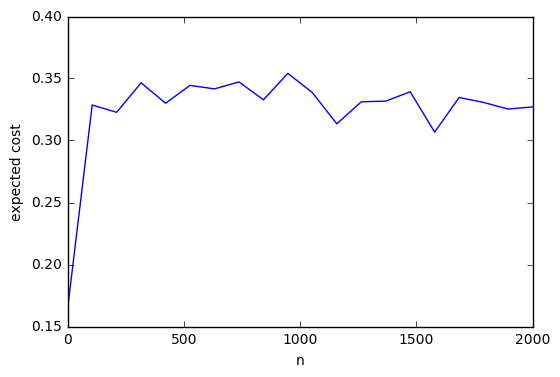

In [3]:
ns = np.linspace(1.,2000,20)
p = 2.
t = 500

Ecs = [sim_exp_cost_asgn(int(n),t,p) for n in ns]

plt.plot(ns,Ecs)
plt.xlabel('n')
plt.ylabel('expected cost')
plt.show()

power
[0.54029008]
factor
[-1.07613312]


/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


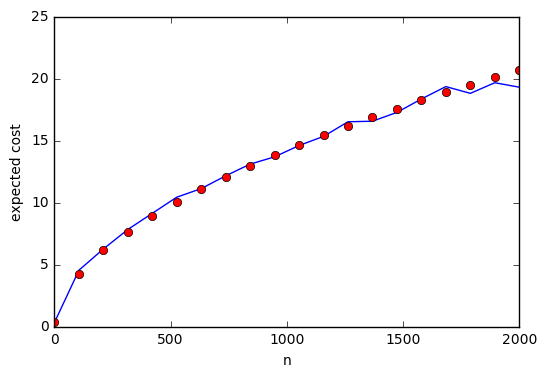

In [4]:
ns = np.linspace(1.,2000,20)
p = 1.
t = 500

Ecs = [sim_exp_cost_asgn(int(n),t,p) for n in ns]

# fit least squares of form f(x) = a*x^b
A = np.vstack([np.log(ns), np.ones(len(ns))]).T
b, a = np.linalg.lstsq(A, np.log(np.array(Ecs)))[0]

print 'power'
print b
print 'factor'
print a                    
                       
plt.plot(ns,Ecs)
plt.plot(ns,[math.exp(a)*(n**b) for n in ns], 'ro')
plt.xlabel('n')
plt.ylabel('expected cost')
plt.show()

power
[0.28665185]
factor
0.276306742149


/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


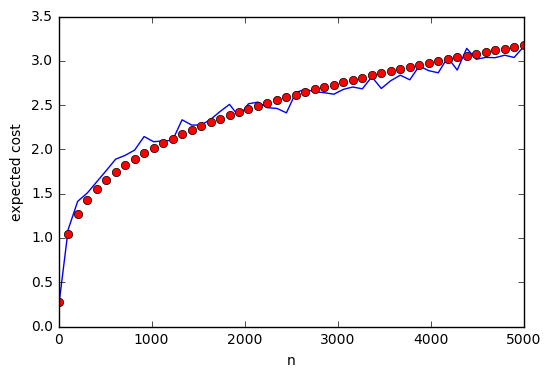

In [5]:
ns = np.linspace(1.,5000,50)
p = 1.5
t = 500

Ecs = [sim_exp_cost_asgn(int(n),t,p) for n in ns]

# fit least squares of form f(x) = a*x^b
A = np.vstack([np.log(ns), np.ones(len(ns))]).T
b, a = np.linalg.lstsq(A, np.log(np.array(Ecs)))[0]

print 'power'
print b
print 'factor'
print math.exp(a)                    
                       
plt.plot(ns,Ecs)
plt.plot(ns,[math.exp(a)*(n**b) for n in ns], 'ro')
plt.xlabel('n')
plt.ylabel('expected cost')
plt.show()

power
[-0.40274353]
factor
0.158059725031


/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


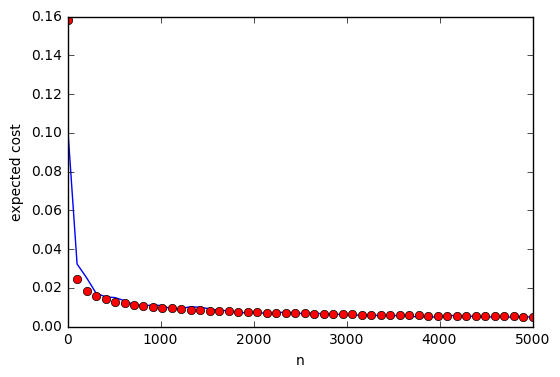

In [6]:
ns = np.linspace(1.,5000,50)
p = 3
t = 500

Ecs = [sim_exp_cost_asgn(int(n),t,p) for n in ns]

# fit least squares of form f(x) = a*x^b
A = np.vstack([np.log(ns), np.ones(len(ns))]).T
b, a = np.linalg.lstsq(A, np.log(np.array(Ecs)))[0]

print 'power'
print b
print 'factor'
print math.exp(a)                    
                       
plt.plot(ns,Ecs)
plt.plot(ns,[math.exp(a)*(n**b) for n in ns], 'ro')
plt.xlabel('n')
plt.ylabel('expected cost')
plt.show()

/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


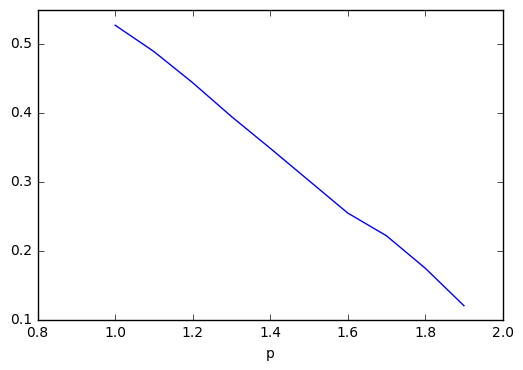

In [7]:
ps = np.linspace(1.,1.9,10)

powers = [0.]*len(ps)
factors = [0.]*len(ps)

for k in range(len(ps)):
    p = ps[k]
    
    ns = np.linspace(1.,2000,20)
    t = 500
    Ecs = [sim_exp_cost_asgn(int(n),t,p) for n in ns]
    A = np.vstack([np.log(ns), np.ones(len(ns))]).T
    b, a = np.linalg.lstsq(A, np.log(np.array(Ecs)))[0]
    
    powers[k] = b
    factors[k] = math.exp(a)
    
plt.plot(ps,powers)
plt.xlabel('p')
plt.show()

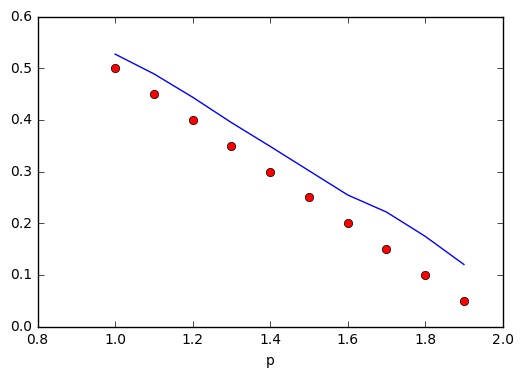

In [8]:
plt.plot(ps,powers)
plt.plot(ps,[1.-p/2. for p in ps], 'ro')
#plt.plot(ps,[1./(p/2.-1) for p in ps], 'go')
plt.xlabel('p')
plt.show()

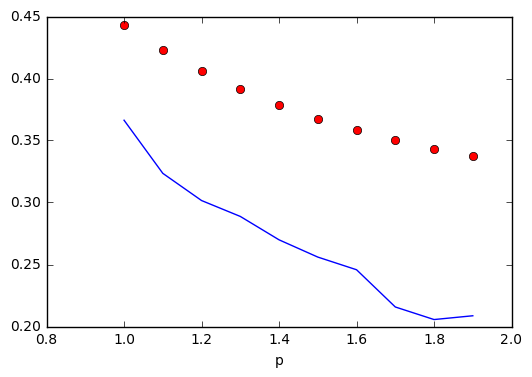

In [9]:
plt.plot(ps,factors)
plt.plot(ps,[gamma(1.+p/2.)/(1.+p) for p in ps], 'ro')
#plt.plot(ps,[1./(p/2.-1) for p in ps], 'go')
plt.xlabel('p')
plt.show()

In [10]:
gamma(0.4)

2.218159543757688